### CS 181 Practical, Spring 2023
author: kchattopadhyay, sbharthulwar, msoshi


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

## Load the data files into local memory from the GCP bucket.

In [ ]:
!gsutil cp gs://cs181_practical_data/Xtrain_amp.npy ./
!gsutil cp gs://cs181_practical_data/ytrain_amp.npy ./

!gsutil cp gs://cs181_practical_data/Xtest_amp.npy ./
!gsutil cp gs://cs181_practical_data/ytest_amp.npy ./

!gsutil cp gs://cs181_practical_data/Xtrain_mel.npy ./
!gsutil cp gs://cs181_practical_data/ytrain_mel.npy ./

!gsutil cp gs://cs181_practical_data/Xtest_mel.npy ./
!gsutil cp gs://cs181_practical_data/ytest_mel.npy ./

Copying gs://cs181_practical_data/Xtrain_amp.npy...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

/ [1 files][934.2 MiB/934.2 MiB]   28.6 MiB/s                                   
Operation completed over 1 objects/934.2 MiB.                                    
Copying gs://cs181_practical_data/ytrain_amp.npy...
/ [1 files][ 43.5 KiB/ 43.5 KiB]                                                
Operation completed over 1 objects/43.5 KiB.                                     
Copying gs://cs181_practical_data/Xtest_amp.npy...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

\ [1 files][369.6 MiB/369.6 M

### Load raw amplitude data as a numpy object.

In [ ]:
# Load train data
X_amp_train = np.load("Xtrain_amp.npy")
X_amp_train_df = pd.DataFrame(X_amp_train)
y_amp_train = np.load("ytrain_amp.npy")

In [ ]:
X_amp_train.shape

(5553, 44100)

In [ ]:
# Load test data
X_amp_test = np.load("Xtest_amp.npy")
y_amp_test = np.load("ytest_amp.npy")

In [ ]:
X_amp_test.shape

(2197, 44100)

In [ ]:
X_amp_test[0]

array([-0.12574053, -0.12328652, -0.09769469, ..., -0.09433126,
       -0.0751991 , -0.02500766], dtype=float32)

In [ ]:
pca = PCA(random_state=181)
pca.fit(X_amp_train_df)

PCA(random_state=181)

In [ ]:
amp_model = LogisticRegression('l2', tol=1e-4, max_iter = 1000, verbose = 1)
amp_model.fit(X_amp_train, y_amp_train)

amp_pred_train = amp_model.predict(X_amp_train)
amp_acc_train = np.mean(y_amp_train == amp_pred_train)

amp_pred_test = amp_model.predict(X_amp_test)
amp_acc_test = np.mean(y_amp_test == amp_pred_test)

print("Train accuracy: {} \n Test accuracy: {}".format(amp_acc_train, amp_acc_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished


Train accuracy: 0.9773095623987034 
 Test accuracy: 0.17888029130632682


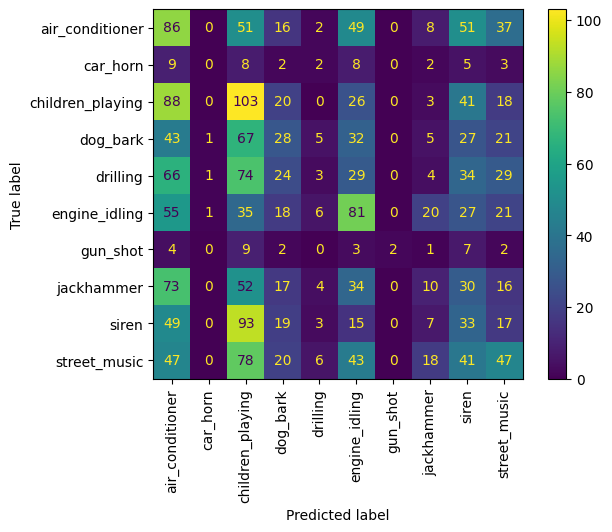

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_amp_test, amp_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])
disp.plot()
plt.xticks(rotation=90);

In [ ]:
class_accuracies = cm.diagonal()/cm.sum(axis=1)
pd.DataFrame(class_accuracies, columns=['Accuracy'], index=['air_conditioner', 'car_horn', 'children_playing',
                                                            'dog_bark', 'drilling', 'engine_idling', 'gun_shot',
                                                            'jackhammer', 'siren', 'street_music'])

,Accuracy
air_conditioner,0.286667
car_horn,0.000000
children_playing,0.344482
dog_bark,0.122271
drilling,0.011364
engine_idling,0.306818
gun_shot,0.066667
jackhammer,0.042373
siren,0.139831
street_music,0.156667


### Load Mel spectrogram data as a numpy object.

In [ ]:
# Load train data
X_mel_train = np.load("Xtrain_mel.npy")
y_mel_train = np.load("ytrain_mel.npy")

In [ ]:
X_mel_train.shape

(5553, 128, 87)

In [ ]:
# Flatten X_mel_train's spectrogram features
X_mel_train_flat = X_mel_train.reshape(X_mel_train.shape[0], -1)
X_mel_train_flat.shape

(5553, 11136)

In [ ]:
# Load test data
X_mel_test = np.load("Xtest_mel.npy")
y_mel_test = np.load("ytest_mel.npy")

In [ ]:
X_mel_test.shape

(2197, 128, 87)

In [ ]:
X_mel_test_flat = X_mel_test.reshape(X_mel_test.shape[0], -1)
X_mel_test_flat.shape

(2197, 11136)

In [ ]:
mel_model = LogisticRegression('l2', tol=1e-4, max_iter = 2000, verbose = True)
mel_model.fit(X_mel_train_flat, y_mel_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 33.0min finished


LogisticRegression(max_iter=2000, verbose=True)

In [ ]:
mel_pred_train = mel_model.predict(X_mel_train_flat)
mel_acc_train = np.mean(y_mel_train == mel_pred_train)

mel_pred_test = mel_model.predict(X_mel_test_flat)
mel_acc_test = np.mean(y_mel_test == mel_pred_test)

print("Train accuracy: {} \n Test accuracy: {}".format(mel_acc_train, mel_acc_test))

Train accuracy: 0.9827120475418692 
 Test accuracy: 0.3522985889849795


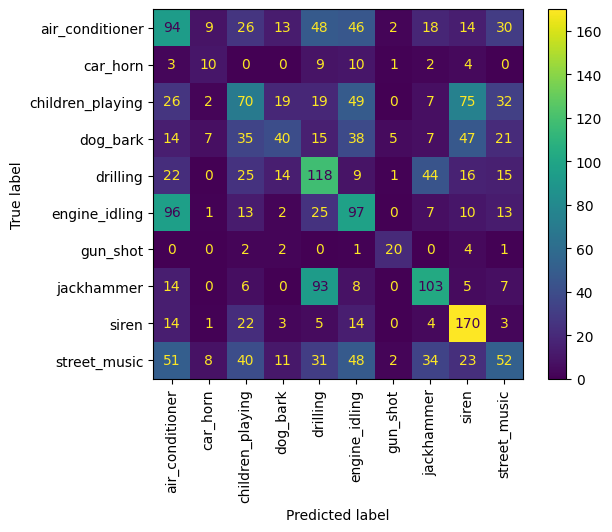

In [ ]:
cm = confusion_matrix(y_mel_test, mel_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])
disp.plot()
plt.xticks(rotation=90);

In [ ]:
class_accuracies = cm.diagonal()/cm.sum(axis=1)

In [ ]:
pd.DataFrame(class_accuracies, columns=['Accuracy'], index=['air_conditioner', 'car_horn', 'children_playing',
                                                            'dog_bark', 'drilling', 'engine_idling', 'gun_shot',
                                                            'jackhammer', 'siren', 'street_music'])

,Accuracy
air_conditioner,0.313333
car_horn,0.333333
children_playing,0.230769
dog_bark,0.174672
drilling,0.450758
engine_idling,0.382576
gun_shot,0.666667
jackhammer,0.457627
siren,0.733051
street_music,0.176667


In [ ]:
mel_model_knn = KNeighborsClassifier()
mel_model_knn.fit(X_mel_train_flat, y_mel_train)

mel_predknn_train = mel_model_knn.predict(X_mel_train_flat)
mel_accknn_train = np.mean(y_mel_train == mel_predknn_train)

mel_predknn_test = mel_model_knn.predict(X_mel_test_flat)
mel_accknn_test = np.mean(y_mel_test == mel_predknn_test)

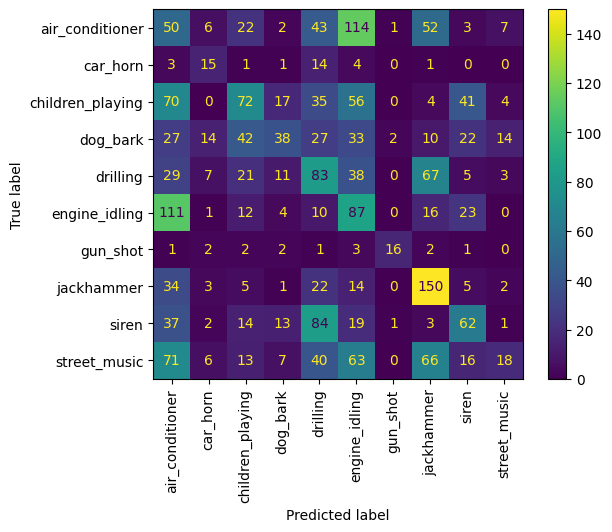

In [ ]:
cm = confusion_matrix(y_mel_test, mel_predknn_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])
disp.plot()
plt.xticks(rotation=90);

In [ ]:
class_accuracies = cm.diagonal()/cm.sum(axis=1)
pd.DataFrame(class_accuracies, columns=['Accuracy'], index=['air_conditioner', 'car_horn', 'children_playing',
                                                            'dog_bark', 'drilling', 'engine_idling', 'gun_shot',
                                                            'jackhammer', 'siren', 'street_music'])

,Accuracy
air_conditioner,0.166667
car_horn,0.384615
children_playing,0.240803
dog_bark,0.165939
drilling,0.314394
engine_idling,0.329545
gun_shot,0.533333
jackhammer,0.635593
siren,0.262712
street_music,0.060000


In [ ]:
print("Train accuracy: {} \n Test accuracy: {}".format(mel_accknn_train, mel_accknn_test))

Train accuracy: 0.5953538627768774 
 Test accuracy: 0.2690031861629495


In [ ]:
mel_model_knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

k_range = list(2**i for i in range(1, 12))
params = dict(n_neighbors=k_range)
grid_search = GridSearchCV(mel_model_knn, params, cv = 10, verbose=1)

grid_search.fit(X_mel_train_flat, y_mel_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 8, 16, 32, 64, 128, 256, 512,
                                         1024, 2048]},
             verbose=1)

In [ ]:
melg_predknn_train = grid_search.predict(X_mel_train_flat)
melg_accknn_train = np.mean(y_mel_train == melg_predknn_train)

melg_predknn_test = grid_search.predict(X_mel_test_flat)
melg_accknn_test = np.mean(y_mel_test == melg_predknn_test)

In [ ]:
print("Train accuracy: {} \n Test accuracy: {}".format(melg_accknn_train, melg_accknn_test))

Train accuracy: 0.7435620385377274 
 Test accuracy: 0.2598998634501593


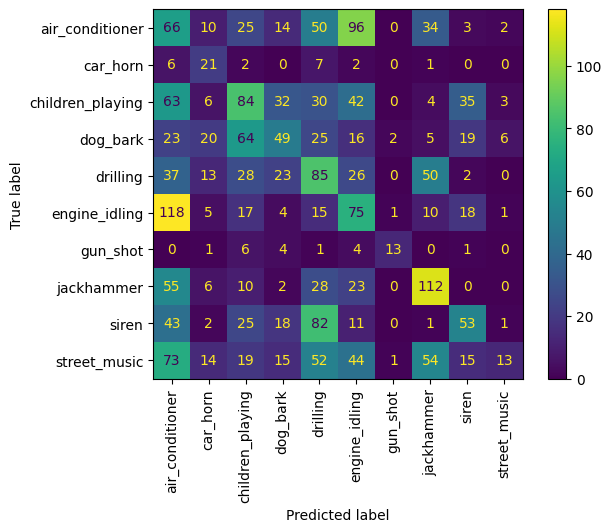

In [ ]:
cm = confusion_matrix(y_mel_test, melg_predknn_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])
disp.plot()
plt.xticks(rotation=90);

In [ ]:
class_accuracies = cm.diagonal()/cm.sum(axis=1)
pd.DataFrame(class_accuracies, columns=['Accuracy'], index=['air_conditioner', 'car_horn', 'children_playing',
                                                            'dog_bark', 'drilling', 'engine_idling', 'gun_shot',
                                                            'jackhammer', 'siren', 'street_music'])

,Accuracy
air_conditioner,0.220000
car_horn,0.538462
children_playing,0.280936
dog_bark,0.213974
drilling,0.321970
engine_idling,0.284091
gun_shot,0.433333
jackhammer,0.474576
siren,0.224576
street_music,0.043333


In [ ]:
print(mel_predknn_train)

### Delete an object from local memory.

The "del" keyword in Python is used to dereference objects from local memory.  You can use it to save memory by getting rid of variables that you don't intend to use anymore.

For example, to delete the variable X_mel_train:

In [ ]:
del X_mel_train

## Feature Engineering

In [ ]:
def make_spec(amp_i):
    mel_i = librosa.feature.melspectrogram(y=amp_i, sr=22050)
    assert mel_i.shape == (128,87)
    mel_i = mel_i.reshape(1,mel_i.shape[0],mel_i.shape[1])
    return mel_i

def amps_to_specs(fold='train'):
    amps = np.load('X{}_amp.npy'.format(fold))
    ys = np.load('y{}_amp.npy'.format(fold))
    mels = [make_spec(amp) for amp in amps]
    del amps # save memory
    mels = np.concatenate(mels,axis=0)
    np.save('X{}_mel.npy'.format(fold),mels)
    np.save('y{}_mel.npy'.format(fold),ys)
    del mels # save memory

**CNNs applied to spectrogram data**

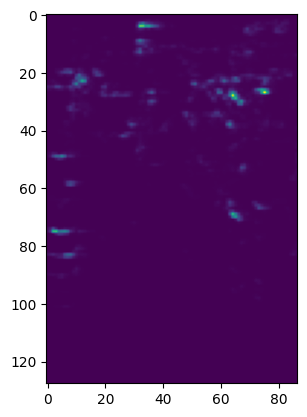

In [ ]:
plt.imshow(X_mel_train[0])

In [ ]:
print(X_mel_train.shape)

(5553, 128, 87)


In [ ]:
import tensorflow as tf
import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [128, 87, 1]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation ='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 85, 2)        20        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 42, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 40, 64)        1216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 18, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 32256)             0

In [ ]:
def one_hot_encoding(y):
    y_one_hot_encoding = np.zeros((10, y.shape[0]))
    for i in range(y.shape[0]):
        y_one_hot_encoding[y[i], i] = 1
    return y_one_hot_encoding

y_train_new = one_hot_encoding(y_mel_train).T
y_test_new = one_hot_encoding(y_mel_test).T

In [ ]:
print(X_mel_test.shape)

(2197, 128, 87)


In [ ]:
X_mel_train = X_mel_train.reshape(5553, 128, 87, 1)
X_mel_test = X_mel_test.reshape(2197, 128, 87, 1)

print(X_mel_train.shape)
print(X_mel_test.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(5553, 128, 87, 1)
(2197, 128, 87, 1)
(5553, 10)
(2197, 10)


In [ ]:
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_mel_train, y_train_new, epochs=15)

Epoch 1/15
174/174 [==============================] - 139s 789ms/step - loss: 1.9215 - accuracy: 0.4173
Epoch 2/15
174/174 [==============================] - 121s 697ms/step - loss: 1.1922 - accuracy: 0.5959
Epoch 3/15
174/174 [==============================] - 115s 664ms/step - loss: 0.9470 - accuracy: 0.6868
Epoch 4/15
174/174 [==============================] - 115s 662ms/step - loss: 0.7678 - accuracy: 0.7443
Epoch 5/15
174/174 [==============================] - 115s 659ms/step - loss: 0.6966 - accuracy: 0.7848
Epoch 6/15
174/174 [==============================] - 115s 659ms/step - loss: 0.5262 - accuracy: 0.8347
Epoch 7/15
174/174 [==============================] - 115s 659ms/step - loss: 0.4805 - accuracy: 0.8525
Epoch 8/15
174/174 [==============================] - 118s 681ms/step - loss: 0.4526 - accuracy: 0.8741
Epoch 9/15
174/174 [==============================] - 114s 654ms/step - loss: 0.4396 - accuracy: 0.8750
Epoch 10/15
174/174 [==============================] - 115s 662m

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds = model.predict(X_mel_test)
print(preds.shape)


69/69 [==============================] - 13s 184ms/step
(2197, 10)


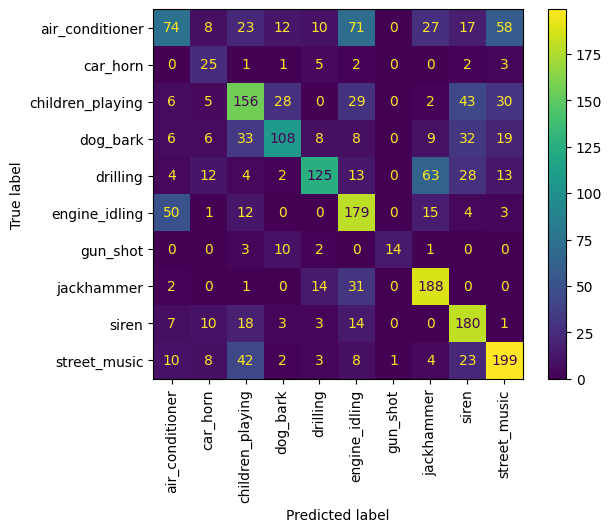

In [ ]:
unencoded = []
for i in range(2197):
  unencoded.append(np.argmax(preds[i]))

cm = confusion_matrix(y_mel_test, unencoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])
disp.plot()
plt.xticks(rotation=90);

In [ ]:
np.mean(y_mel_test == unencoded)